In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
train = pd.read_csv('train_E1GspfA.csv')
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [103]:
train.shape

(18247, 3)

In [104]:
train.isnull().sum()

date      0
hour      0
demand    0
dtype: int64

In [105]:
test = pd.read_csv('test_6QvDdzb.csv')
test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [106]:
test.shape

(7650, 2)

<AxesSubplot:>

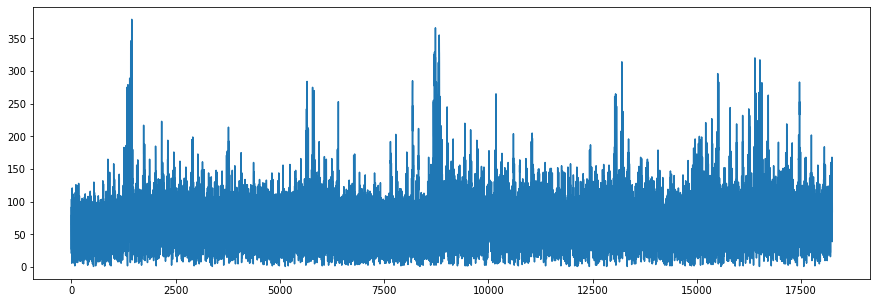

In [107]:
train['demand'].plot(figsize = (15, 5))

In [108]:
newtrain = train.copy()

In [109]:
newtest = test.copy()

In [110]:
newtrain['hour'] = newtrain['hour'].astype(str)

In [111]:
newtrain['hour'] = newtrain['hour']+':00:00'

In [112]:
newtrain['date'] = pd.to_datetime(newtrain['date'] + ' ' + newtrain['hour'])

In [113]:
newtest['hour'] = newtest['hour'].astype(str)

In [114]:
newtest['hour'] = newtest['hour']+':00:00'

In [115]:
newtest['date'] = pd.to_datetime(newtest['date'] + ' ' + newtest['hour'])

In [116]:
newtrain.index = newtrain['date']

In [117]:
newtrain = newtrain.drop(['date', 'hour'], axis = 1)

In [118]:
newtrain.head()

,demand
date,
2018-08-18 09:00:00,91
2018-08-18 10:00:00,21
2018-08-18 13:00:00,23
2018-08-18 14:00:00,104
2018-08-18 15:00:00,81


In [119]:
newtest.index = newtest['date']
newtest = newtest.drop(['date', 'hour'], axis = 1)
newtest.head()

""
date
2021-03-01 00:00:00
2021-03-01 01:00:00
2021-03-01 02:00:00
2021-03-01 03:00:00
2021-03-01 05:00:00


In [120]:
18247/20

912.35

In [121]:
18247-912

17335

In [122]:
train1 = newtrain.iloc[0:17335, :]
test1 = newtrain.iloc[17335: , :]

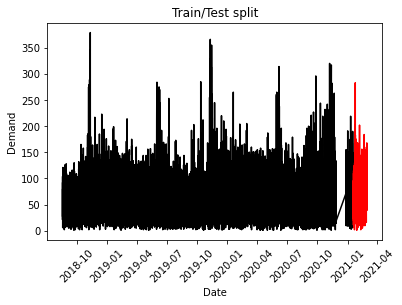

In [123]:
plt.plot(train1, color = "black")
plt.plot(test1, color = "red")
plt.ylabel('Demand')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split")
plt.show()

In [124]:
y = train1['demand']

In [125]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))

D:\E\DataScientist\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\E\DataScientist\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\E\DataScientist\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [126]:
ARIMAmodel = ARIMAmodel.fit()

In [127]:
y_pred = ARIMAmodel.get_forecast(len(test1.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test1.index
y_pred_out = y_pred_df["Predictions"] 

D:\E\DataScientist\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\E\DataScientist\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [128]:
from sklearn.metrics import mean_squared_error
arma_rmse = np.sqrt(mean_squared_error(test1["demand"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  39.008657330748854


In [129]:
from statsmodels.tsa.arima.model import ARIMA

In [133]:
x_train = newtrain
x_test = newtest

In [134]:
from statsmodels.tsa.arima.model import ARIMA

In [135]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

D:\E\DataScientist\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\E\DataScientist\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\E\DataScientist\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [136]:
y_pred = ARIMAmodel.get_forecast(len(newtest.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = newtest.index
y_pred_out = y_pred_df["Predictions"] 

D:\E\DataScientist\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\E\DataScientist\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [137]:
a = y_pred_out.reset_index()

In [138]:
solution = pd.DataFrame({'date' : test.date, 'hour' : test.hour, 'demand' : a['Predictions']})
solution.to_csv('Solution.csv', index = False)